In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py
from datetime import timedelta
from tqdm import tqdm

In [2]:
YG = np.load('inputs/ref/YG.npy')
XG = np.load('inputs/ref/XG.npy')
YC = np.load('inputs/ref/YC.npy')
XC = np.load('inputs/ref/XC.npy')
RF = np.load('inputs/ref/RF.npy')
THETA = np.load('inputs/ref/T.npy')

In [3]:
IMF = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/2D/2D_2005_09C.nc')
IMF2 = nc.Dataset('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/2D/2D_2005_09C.nc')
y1 = np.argmin(abs(IMF['YG'] - YG[0]))
y2 = np.argmin(abs(IMF['YG'] - YG[-1]))
x1 = np.argmin(abs(IMF['XG'] - XG[0]%360))
x2 = np.argmin(abs(IMF['XG'] - XG[-1]%360))
IMF = IMF['SHTfwFlx'][0,y1:y2+1,x1:x2+1]
IMF2 = IMF2['SHTfwFlx'][0,y1:y2+1,x1:x2+1]
IMF[IMF!= 0] = 1

In [4]:
icedraft = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/ICEDRAFT_v8.mat')
icedraft = icedraft['Ice_Map'][y1:y2+1,x1:x2+1]
IMF[icedraft == 0] = 0

In [5]:
grid = h5py.File('/data/SO2/SO24/ANDY/SOHI/Data/Models/SOHI/meta/GRID_v8.mat')
bath = -grid['Depth'][:]
bath = bath[y1:y2+1,x1:x2+1] + icedraft
bath[bath==0] = np.nan

DXG = grid['DXG'][y1:y2+1,x1:x2+1]
XG = grid['XG'][0,x1:x2+1]
XG = ((XG + 180) % 360) - 180
DYG = grid['DYG'][y1:y2+1,x1:x2+1]
YG = grid['YG'][y1:y2+1,0]
RF = grid['RF'][0,:]

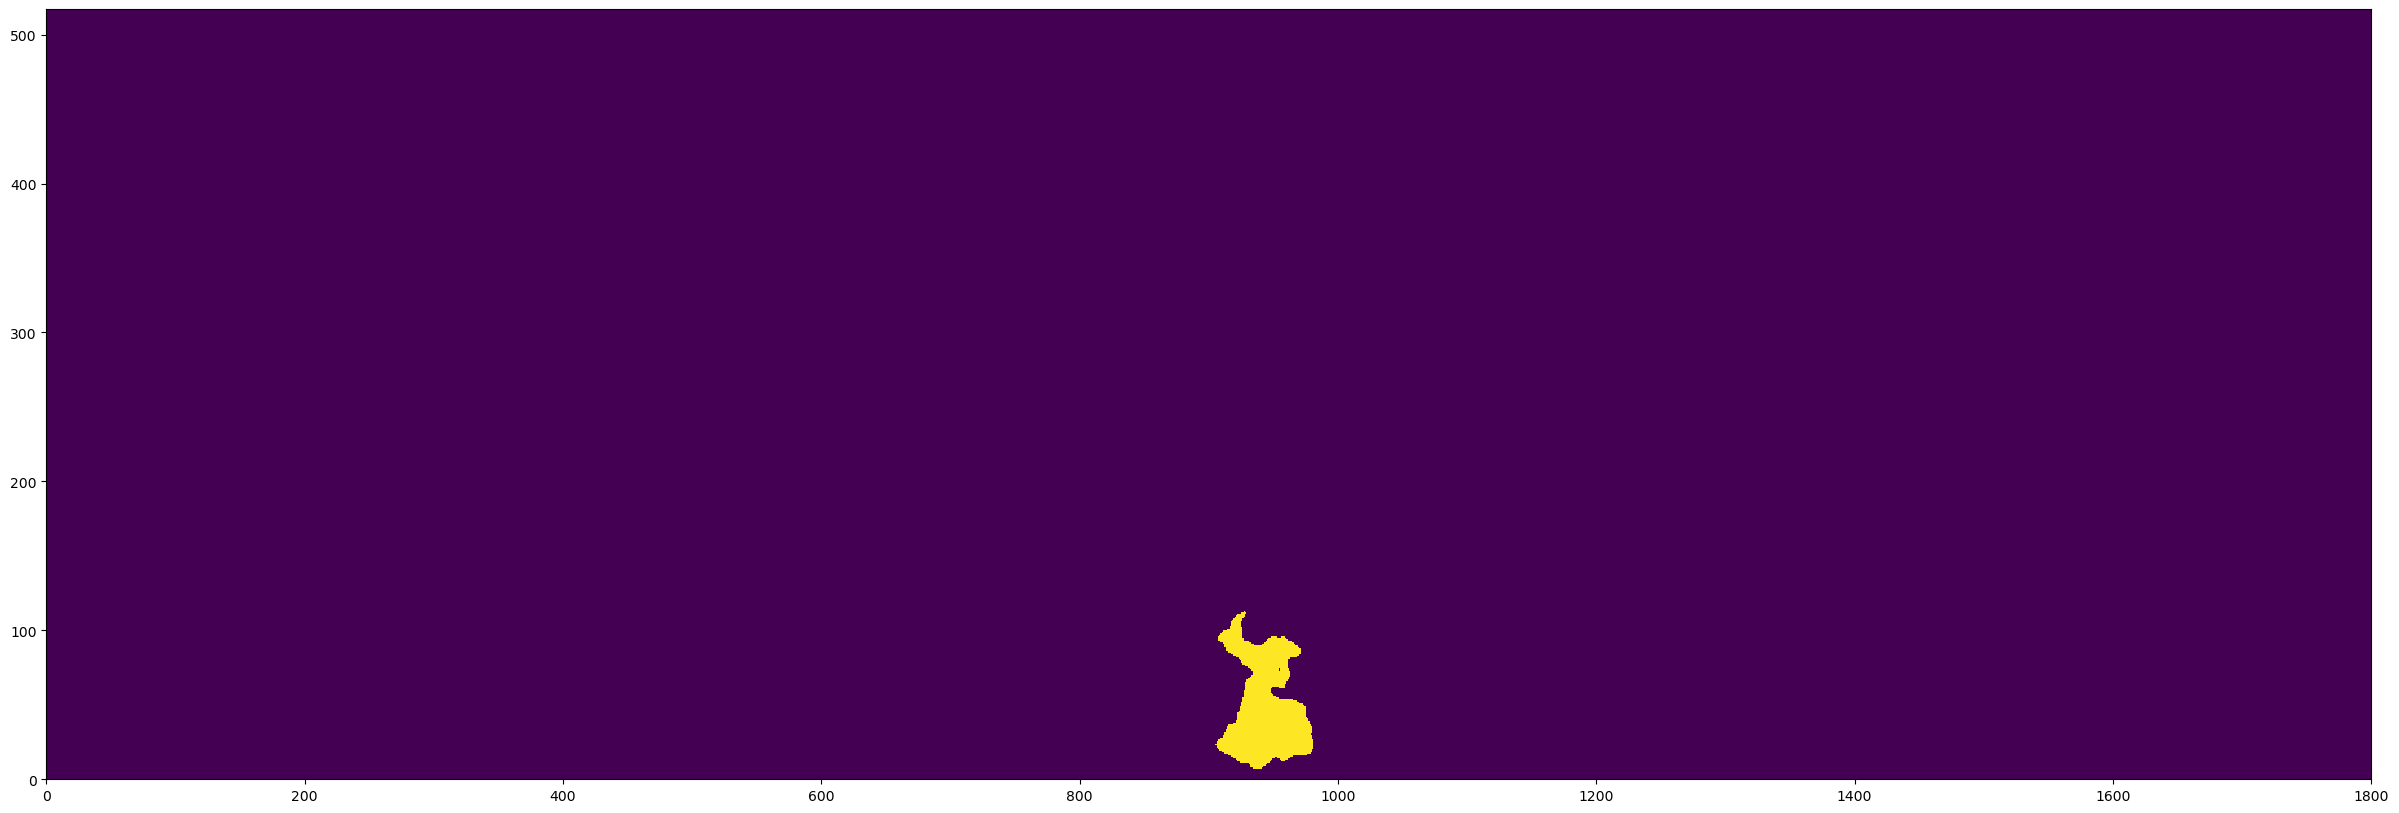

In [6]:
PIG = IMF.copy()
PIG[:, :900] = 0
PIG[130:, :] = 0
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(PIG)

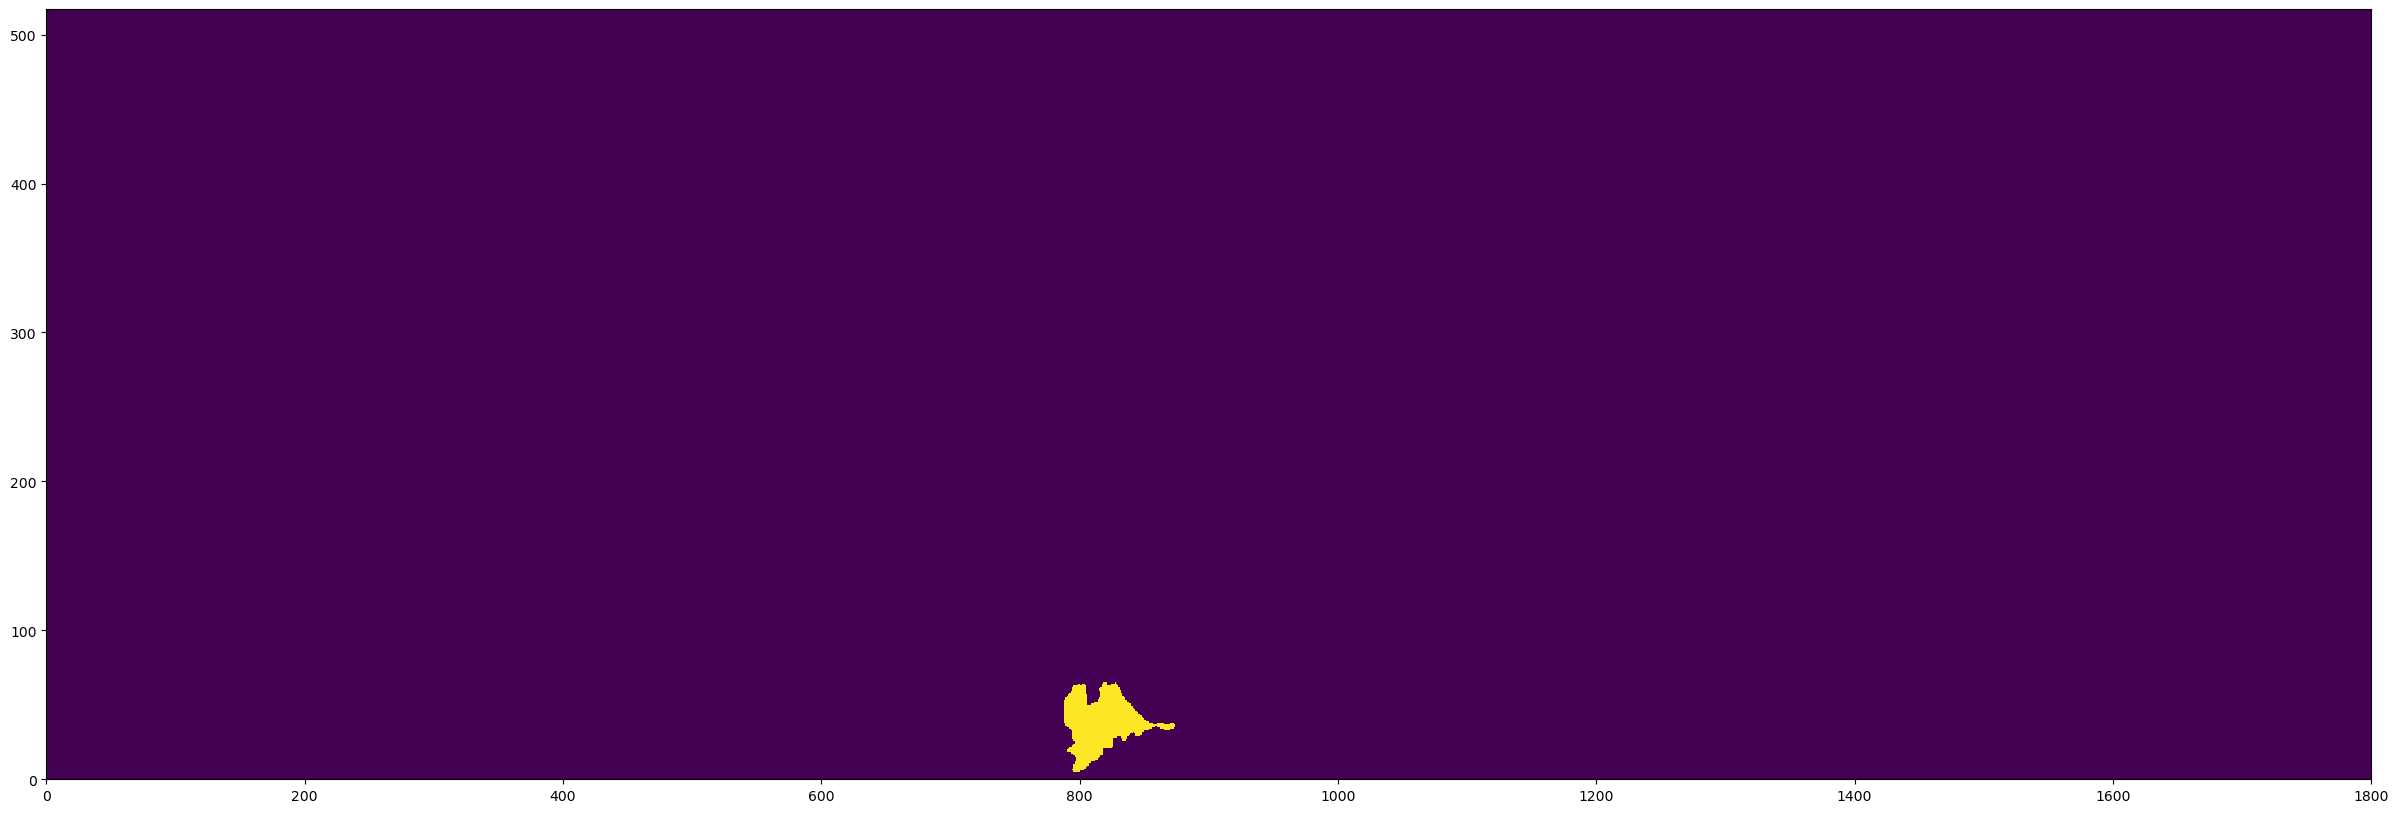

In [7]:
TIS = IMF.copy()
TIS[:, :780] = 0
TIS[:, 900:] = 0
TIS[130:, :] = 0
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(TIS)

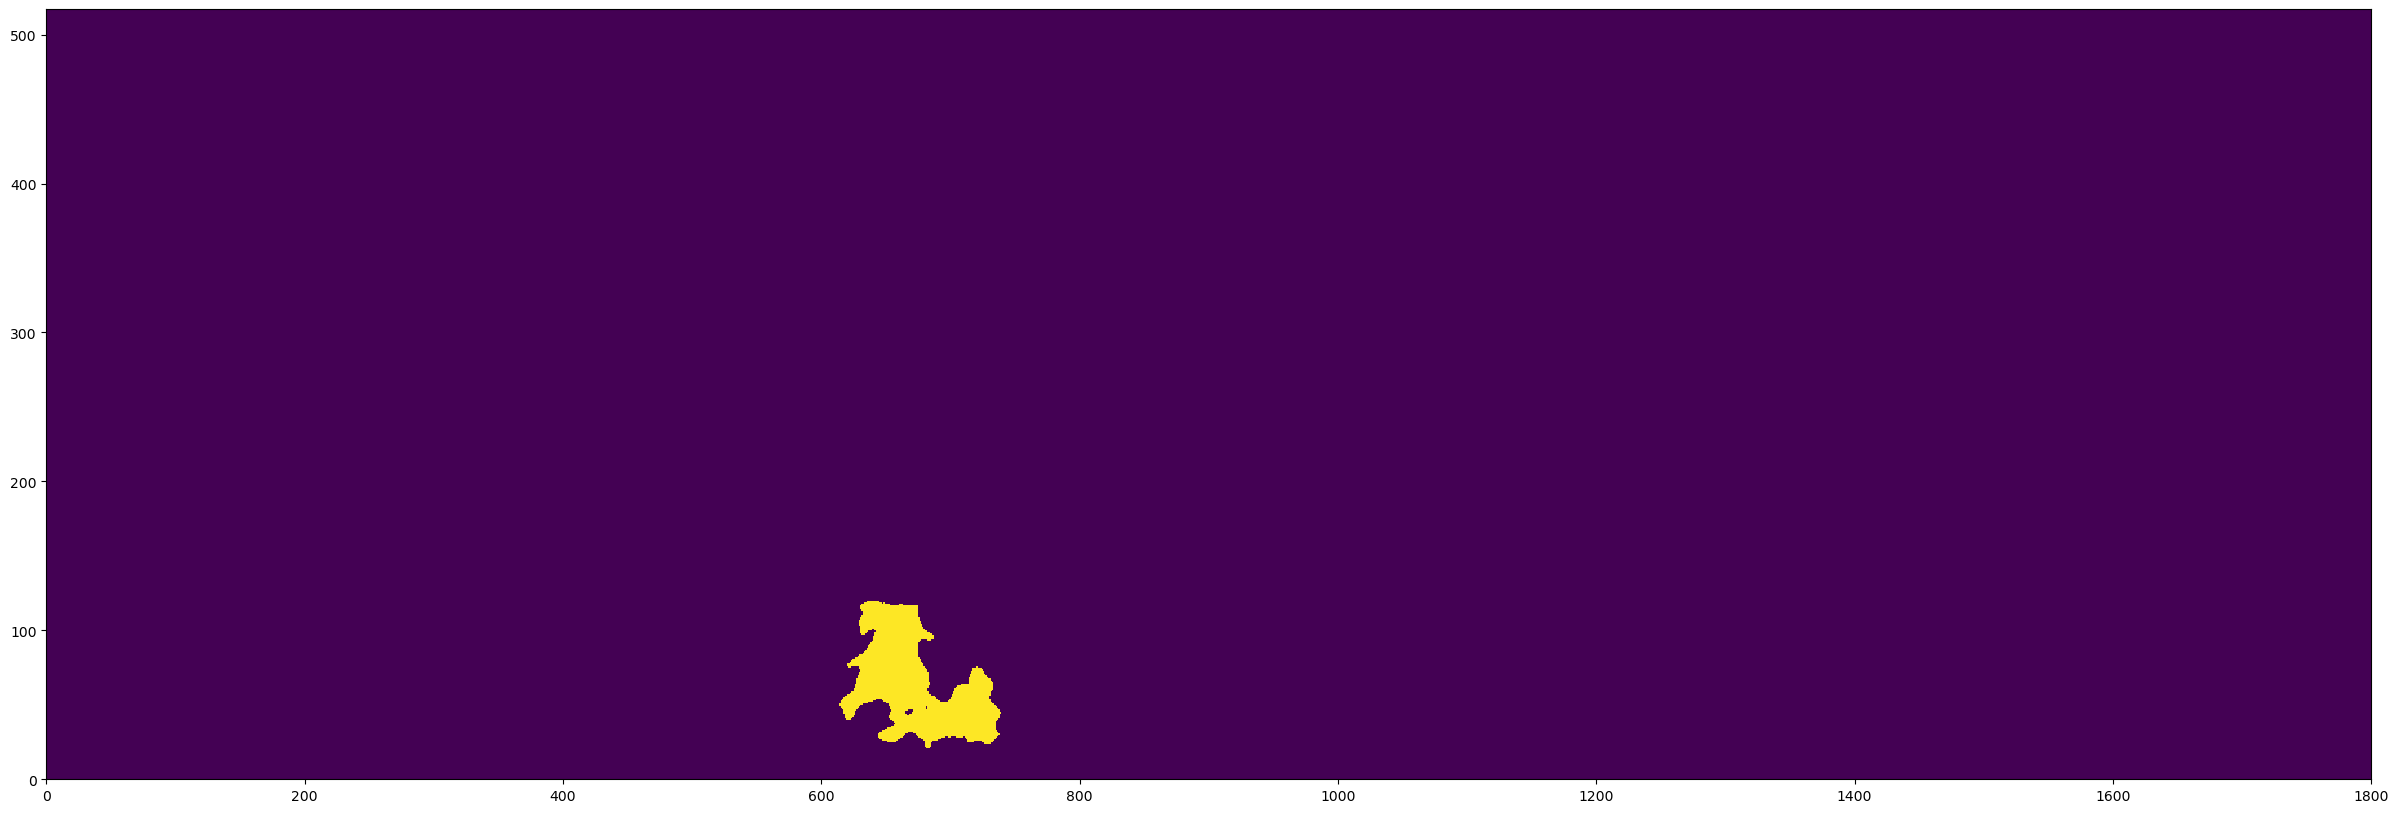

In [8]:
CSN = IMF.copy()
CSN[:,:610] = 0
CSN[:,750:] = 0
CSN[120:, :] = 0
CSN[75:120, 700:720] = 0
fig, ax = plt.subplots(figsize=(30,10))
ax.pcolormesh(CSN)

# ax.set_xlim(690, 725)
# ax.set_ylim(60, 120)
# ax.grid()
# ax.tick_params(axis='both', labelsize=25)

# Crop Target Region Bath

In [9]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"


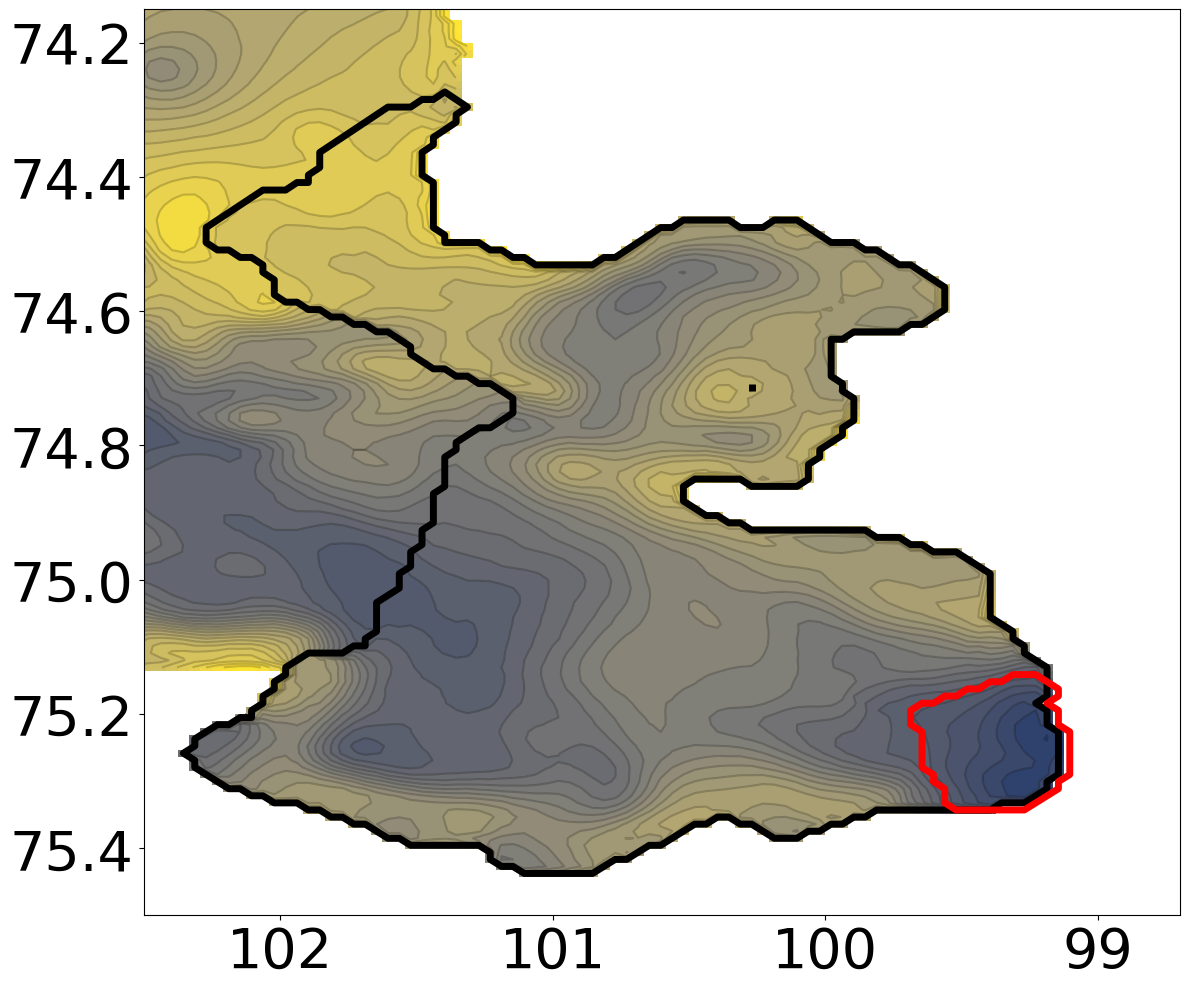

In [10]:
PIG_mask = bath.copy()
PIG_mask[:, :900] = np.nan
PIG_mask[:, 1000:] = np.nan
PIG_mask[150:, :] = np.nan
PIG_mask[:, :940] = np.nan
PIG_mask[PIG_mask>-1000] = np.nan
PIG_mask[~np.isnan(PIG_mask)] = 1
PIG_mask[PIG_mask!= 1] = 0
# PIG_mask[PIG_mask==0] = np.nan

fig, ax = plt.subplots(figsize=(12,10))

ax.pcolormesh(XC, YC, bath, vmin=-1400, cmap='cividis')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1500, 1, 50), cmap='cividis')
ax.contour(XC, YC, bath, levels=np.arange(-1500, 1, 50), colors=['k'], linestyles='solid', alpha=0.2)

ax.contour(XC, YC, PIG, levels=[0,1], linewidths=5, colors=['k'])
ax.contour(XC, YC, PIG_mask, levels=[0,1], linewidths=5, colors=['red'])
#ax.pcolormesh(XC, YC, PIG_mask, cmap='Reds_r', alpha=1)

ax.set_xlim(-102.5, -98.7)
ax.set_xticks([-102, -101, -100, -99])
ax.set_xticklabels([102, 101, 100, 99])
ax.set_ylim(-75.5, -74.15)
ax.set_yticks([-75.4, -75.2, -75, -74.8, -74.6, -74.4, -74.2])
ax.set_yticklabels([75.4, 75.2, 75.0, 74.8, 74.6, 74.4, 74.2])

# ax.set_ylabel(' ', fontsize=25)
# ax.set_xlabel(' ', fontsize=25)
ax.tick_params(axis='both', labelsize=40)
plt.tight_layout()

plt.savefig('img_maps/GL_particles/PIG_bounds.png', dpi=300)

In [13]:
np.save('pig_mask.npy', PIG_mask)

In [19]:
ix = np.argmin(abs(YC - -75.3))
DXG = grid['DXG'][y1:y2+1,x1:x2+1]
DXG[:ix,:]=np.nan
DXG[ix+1:,:]=np.nan
DXG[ix,:]=1
DXG[ix, ::10] = 0

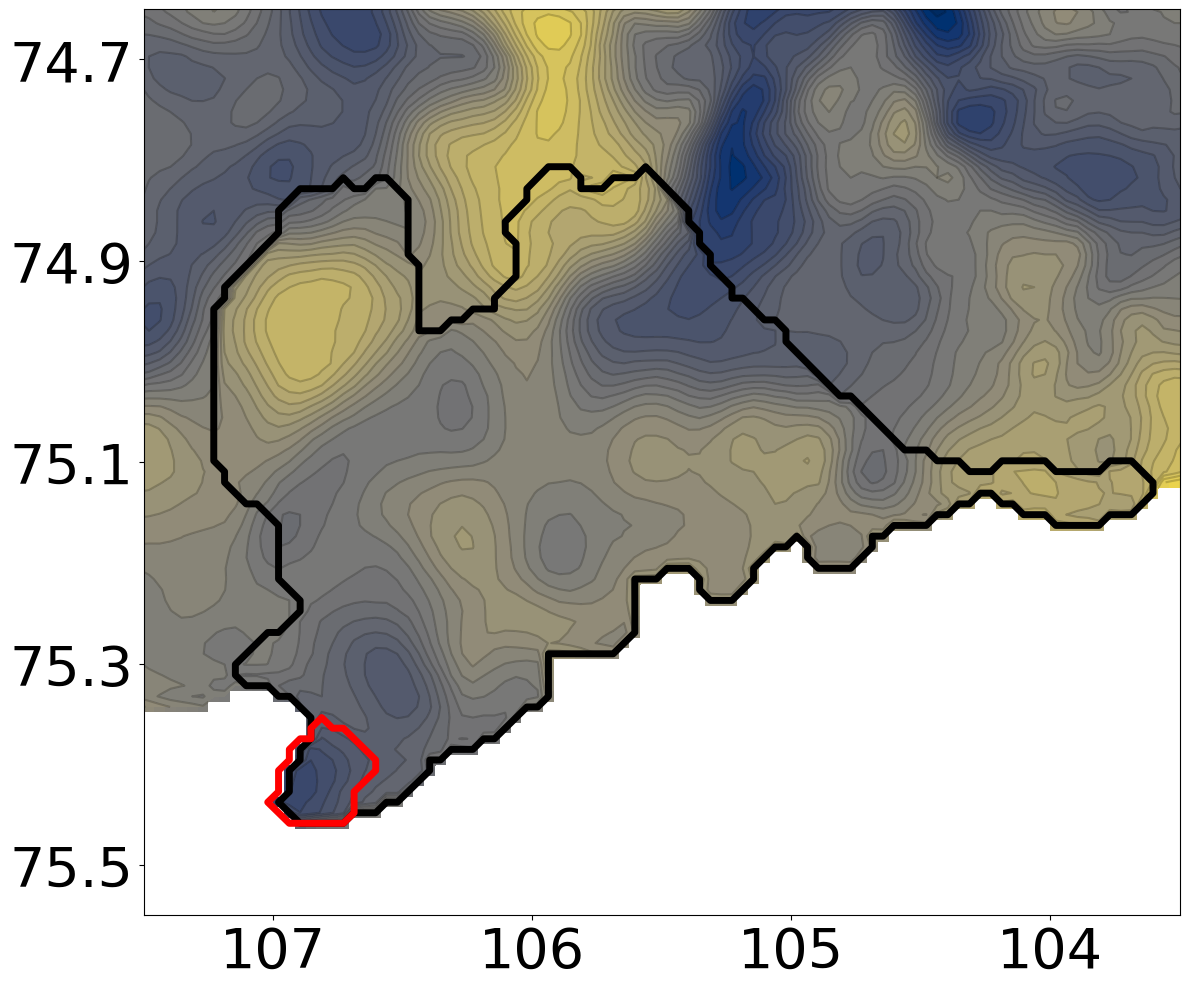

In [20]:
TIS_mask = bath.copy()
TIS_mask[:, :780] = np.nan
TIS_mask[:, 804:] = np.nan
TIS_mask[15:,:] = np.nan
TIS_mask[TIS_mask>-1000] = np.nan
TIS_mask[~np.isnan(TIS_mask)] = 1
TIS_mask[TIS_mask!= 1] = 0

fig, ax = plt.subplots(figsize=(12,10))

ax.pcolormesh(XC, YC, bath, vmin=-1400, cmap='cividis')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1500, 1, 50), cmap='cividis')
ax.contour(XC, YC, bath, levels=np.arange(-1500, 1, 50), colors=['k'], linestyles='solid', alpha=0.2)

ax.contour(XC, YC, TIS, levels=[0,1], linewidths=5, colors=['k'])
ax.contour(XC, YC, TIS_mask, levels=[0,1], linewidths=5, colors=['red'])

ax.tick_params(axis='both', labelsize=40)

ax.set_xlim(-107.5, -103.5)
ax.set_xticks([-107, -106, -105, -104])
ax.set_xticklabels([107, 106, 105, 104])
ax.set_ylim(-75.55, -74.65)
ax.set_yticks([-75.5, -75.3, -75.1, -74.9, -74.7])
ax.set_yticklabels([75.5, 75.3, 75.1, 74.9, 74.7])

plt.tight_layout()

plt.savefig('img_maps/GL_particles/TIS_bounds.png', dpi=300)

In [16]:
np.save('tis_mask.npy', TIS_mask)

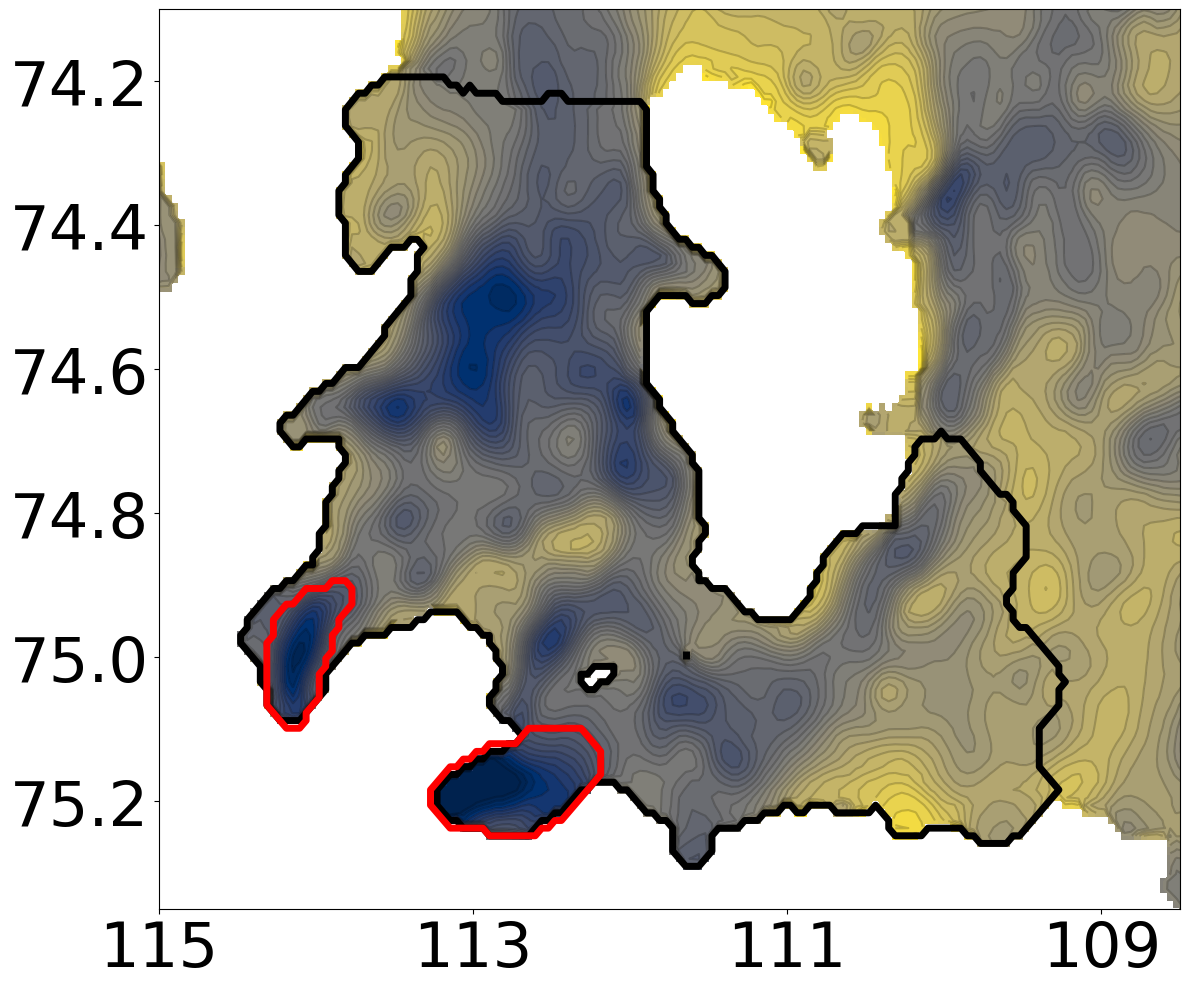

In [17]:
CSN_mask = bath.copy()
CSN_mask[:, :610] = np.nan
CSN_mask[:, 670:] = np.nan
CSN_mask[60:, :] = np.nan
CSN_mask[38:, 650:700] = np.nan
CSN_mask[CSN_mask>-1000] = np.nan
CSN_mask[~np.isnan(CSN_mask)] = 1
CSN_mask[CSN_mask!= 1] = 0

CSN1 = CSN_mask.copy()
CSN1[:, :640] = 0
CSN2 =CSN_mask.copy()
CSN2[:, 640:] = 0

fig, ax = plt.subplots(figsize=(12,10))
ax.pcolormesh(XC, YC, bath, vmin=-1400, cmap='cividis')
im = ax.contourf(XC, YC, bath, levels=np.arange(-1500, 1, 50), cmap='cividis')
ax.contour(XC, YC, bath, levels=np.arange(-1500, 1, 50), colors=['k'], linestyles='solid', alpha=0.2)


ax.contour(XC, YC, CSN, levels=[0,1], linewidths=5, colors=['k'])
ax.contour(XC, YC, CSN1, levels=[0,1], linewidths=5, colors=['red'])
ax.contour(XC, YC, CSN2, levels=[0,1], linewidths=5, colors=['red'])

ax.set_xlim(-115, -108.5)
ax.set_xticks([-115, -113, -111, -109])
ax.set_xticklabels([115, 113,111, 109])
ax.set_ylim(-75.35, -74.1)
ax.set_yticks([-75.2, -75, -74.8, -74.6, -74.4, -74.2])
ax.set_yticklabels([75.2, 75.0, 74.8, 74.6, 74.4, 74.2])

ax.tick_params(axis='both', labelsize=45)

plt.tight_layout()

plt.savefig('img_maps/GL_particles/CSN_bounds.png', dpi=300)

In [18]:
np.save('csn_mask.npy', CSN_mask)

In [165]:
np.save('inputs/run7/Pine_Island_GL_mask.npy', PIG_mask)
np.save('inputs/run7/Thwaites_GL_mask.npy', TIS_mask)
np.save('inputs/run7/Smith_GL_mask.npy', CSN1)
np.save('inputs/run7/Kohler_GL_mask.npy', CSN2)

## Mean Depth

In [19]:
def get_mean_depth(mask_path, bath):
    mask = np.load(mask_path)
    test = bath.copy()
    test = test * mask
    test[test==0] = np.nan
    print(np.nanmean(test))

In [20]:
get_mean_depth('inputs/run7/Pine_Island_GL_mask.npy', bath)

-1119.24438301811


In [21]:
get_mean_depth('inputs/run7/Thwaites_GL_mask.npy', bath)

-1091.110949198405


In [22]:
get_mean_depth('inputs/run7/Smith_GL_mask.npy', bath)

-1322.1525577019002


In [23]:
get_mean_depth('inputs/run7/Kohler_GL_mask.npy', bath)

-1215.167527616024


## Create particles

In [231]:
def place_particles(bath, mask, T, zspacing):
    lats = []
    lons = []
    depths = []
    for i in tqdm(range(bath.shape[0])):
        for j in range(bath.shape[1]):
            if mask[i,j] == 1:
                max_depth = bath[i,j]
                min_depth = max_depth + 100
                for d in np.arange(max_depth+1, min_depth, zspacing):
                    iz = find_backward(d, RF)
                    if ~np.isnan(THETA[iz, i, j]):
                        lats.append(YC[i])
                        lons.append(XC[j])
                        depths.append(d)
    return np.asarray(lats), np.asarray(lons), np.asarray(depths)

In [232]:
lats, lons, depths= place_particles(bath, PIG_mask, THETA, 15)
np.save('inputs/run7/pineisland/lats.npy', lats)
np.save('inputs/run7/pineisland/lons.npy', lons)
np.save('inputs/run7/pineisland/depths.npy', depths)
print(len(lats))

100%|████████████████████████████████████████████████████| 517/517 [00:00<00:00, 2322.05it/s]


1086


In [247]:
lats, lons, depths= place_particles(bath, TIS_mask, THETA, 4)
np.save('inputs/run7/thwaites/lats.npy', lats)
np.save('inputs/run7/thwaites/lons.npy', lons)
np.save('inputs/run7/thwaites/depths.npy', depths)
print(len(lats))

100%|████████████████████████████████████████████████████| 517/517 [00:00<00:00, 2339.08it/s]


1065


In [251]:
lats, lons, depths= place_particles(bath, CSN1, THETA, 20)
np.save('inputs/run7/smith/lats.npy', lats)
np.save('inputs/run7/smith/lons.npy', lons)
np.save('inputs/run7/smith/depths.npy', depths)
print(len(lats))

100%|████████████████████████████████████████████████████| 517/517 [00:00<00:00, 2343.56it/s]


1030


In [259]:
lats, lons, depths= place_particles(bath, CSN2, THETA, 13)
np.save('inputs/run7/kohler/lats.npy', lats)
np.save('inputs/run7/kohler/lons.npy', lons)
np.save('inputs/run7/kohler/depths.npy', depths)
print(len(lats))

100%|████████████████████████████████████████████████████| 517/517 [00:00<00:00, 2448.51it/s]


998


(-75.35, -74.1)

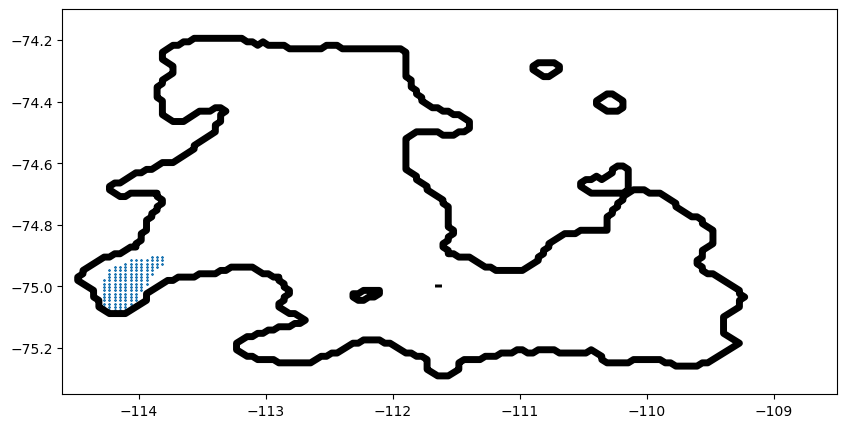

In [260]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(lons, lats, s=0.1)
ax.contour(XC, YC, CSN, levels=[0,1], linewidths=5, colors=['k'])
ax.set_xlim(-114.6, -108.5)
ax.set_ylim(-75.35, -74.1)